## Customer Churn Analysis


**Dataset info:** Sample dataset containing Customer Data and Customes left in a month of a telecom company

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the data
churn_data=pd.read_csv('churn_data.csv')
customer_data=pd.read_csv('customer_data (1).csv')
internet_data=pd.read_csv('internet_data.csv')
#Combining all data files into one consolidated dataframe
data= pd.merge(customer_data,internet_data,how='inner', on='customerID')
telecom_data_raw=pd.merge(data,churn_data,how='inner',on='customerID')
telecom_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Convert Total Charges to float Dtype
telecom_data_raw['TotalCharges']=pd.to_numeric(telecom_data_raw['TotalCharges'],errors='coerce')
telecom_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
telecom_data_raw.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
#remove rows contain null values
telecom_data_raw.dropna(inplace=True)
telecom_data_raw.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#check the descriptive statistics of the numerical variables
telecom_data_raw.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
telecom_data_raw['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [9]:
100*telecom_data_raw['Churn'].value_counts()/telecom_data_raw.shape[0]

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

Data is highly imbalanced,**73:27**

In [10]:
#group the tenure into bins of 12 months
labels=['{0}-{1}'.format(i,i+11) for i in range(1,72,12)]

telecom_data_raw['tenure_group']=pd.cut(telecom_data_raw.tenure,range(1,80,12),right=False,labels=labels)
telecom_data_raw['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

In [11]:
#drop unwanted columns
telecom_data=telecom_data_raw.drop(['tenure','customerID'],axis=1)

## UNIVARIATE ANALYSIS

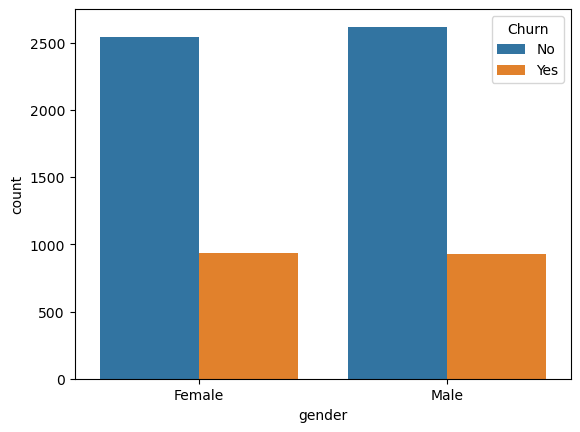

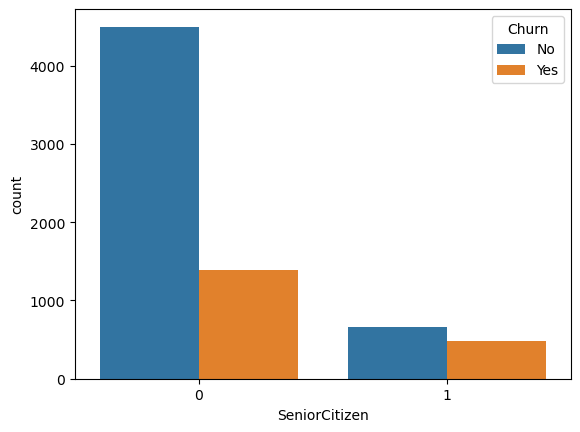

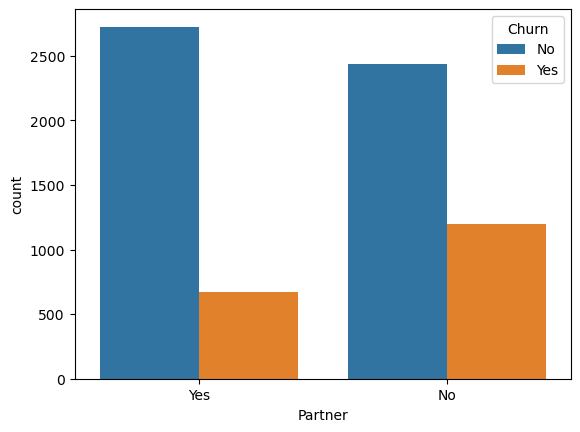

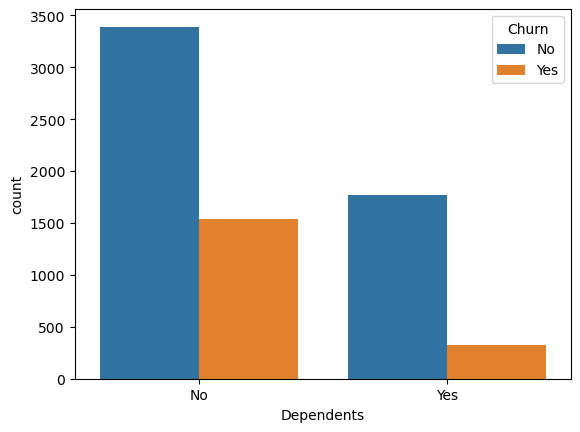

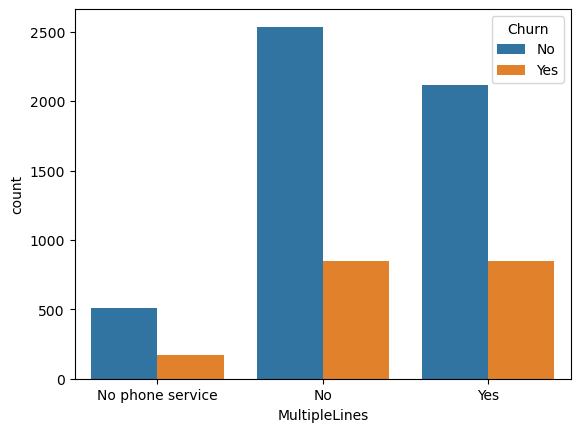

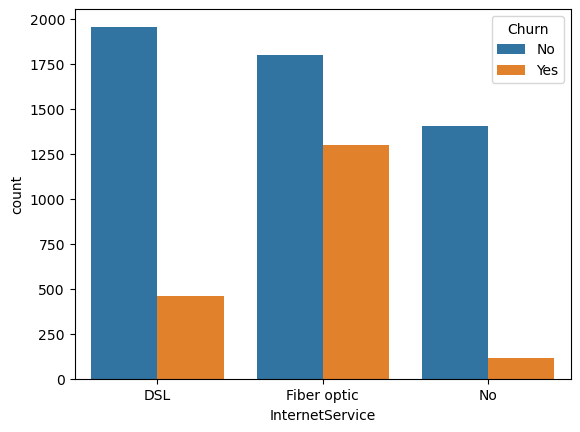

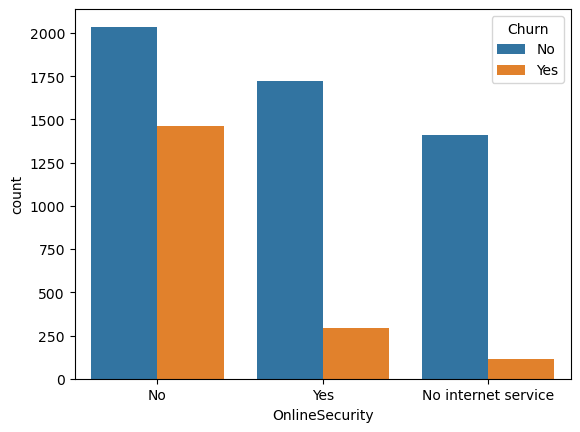

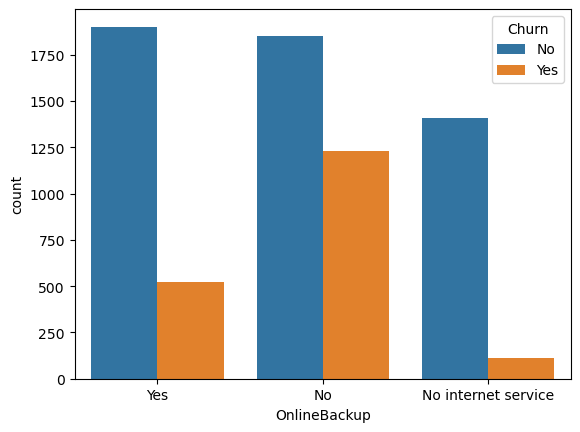

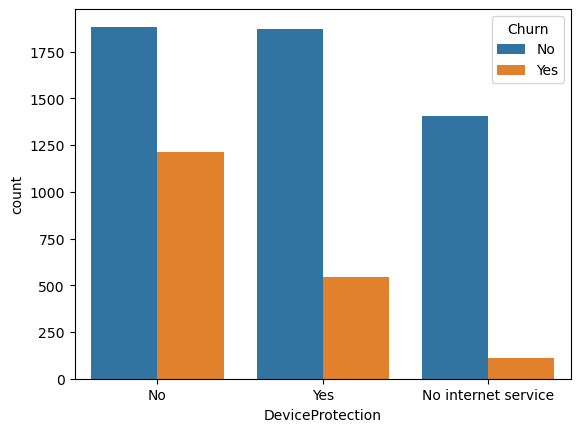

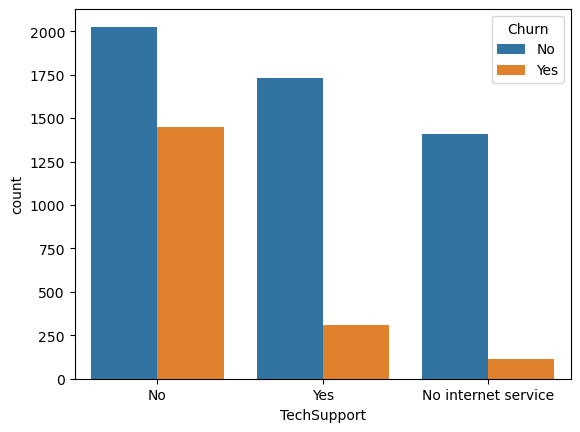

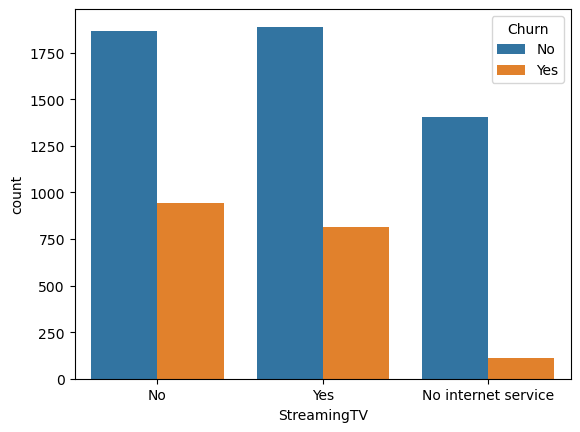

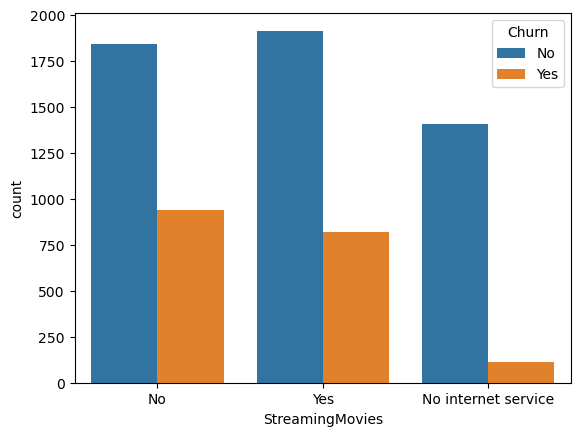

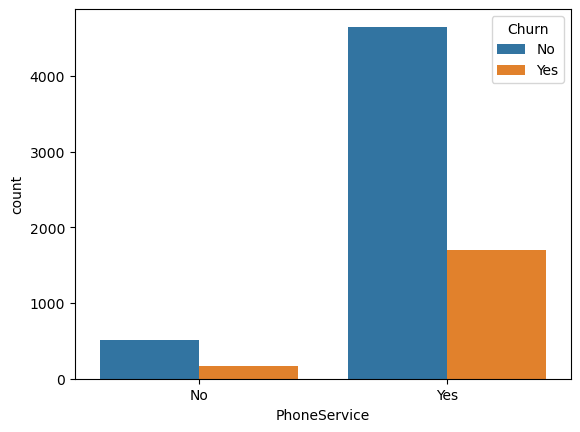

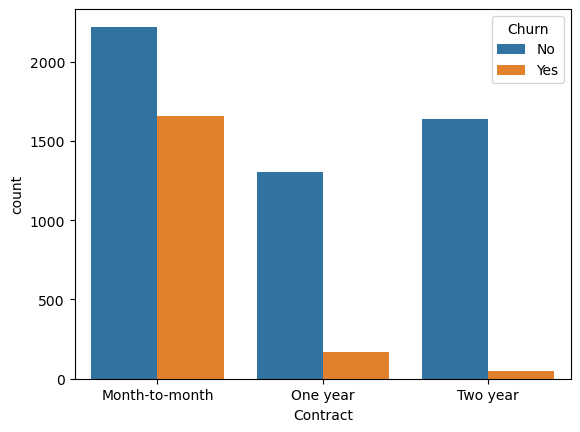

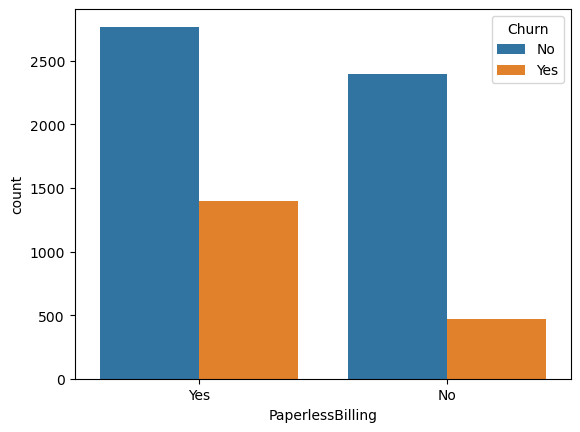

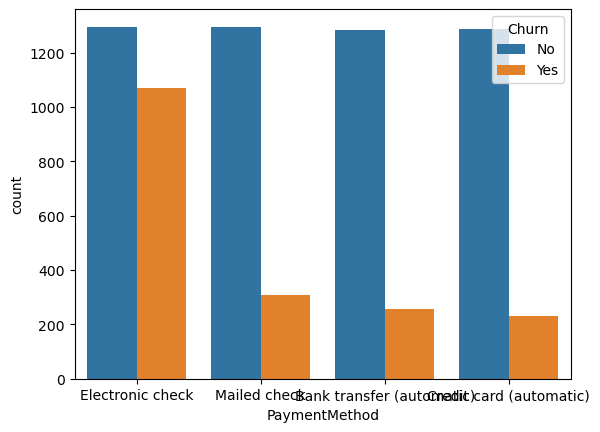

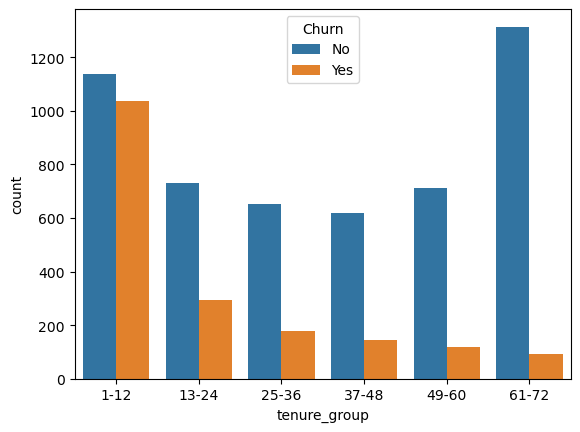

In [12]:
import seaborn as sns
for i,predictor in enumerate(telecom_data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
         plt.figure(i)
         sns.countplot(data=telecom_data,x=predictor,hue='Churn')

In [13]:
#converting the Target variable to binary variable ie,Yes:1,No:0
telecom_data['Churn']=np.where(telecom_data.Churn=='Yes',1,0)
telecom_data.head()


,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,Yes,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [14]:
#convert all the categorical variables into dummy variables
telecom_data_dummies=pd.get_dummies(telecom_data)

telecom_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


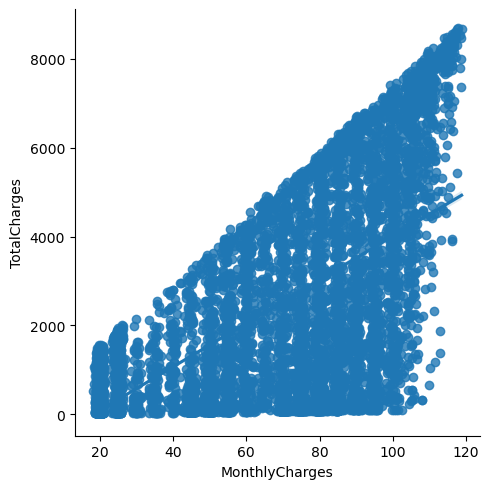

In [15]:
#relationship between monthly and Total Charges
sns.lmplot(data=telecom_data_dummies,x='MonthlyCharges',y='TotalCharges')

Text(0.5, 1.0, 'Monthly charges by churn')

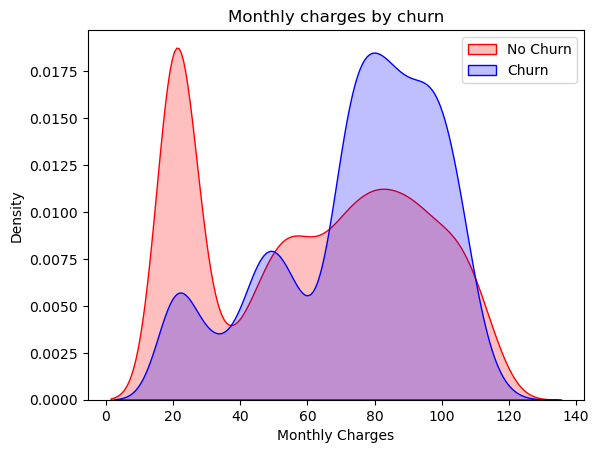

In [16]:
#Churn by Monthly and Total Charges
Mth = sns.kdeplot(telecom_data_dummies.MonthlyCharges[(telecom_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telecom_data_dummies.MonthlyCharges[(telecom_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**insight:** Churn rate increase when Monthly Charges increase

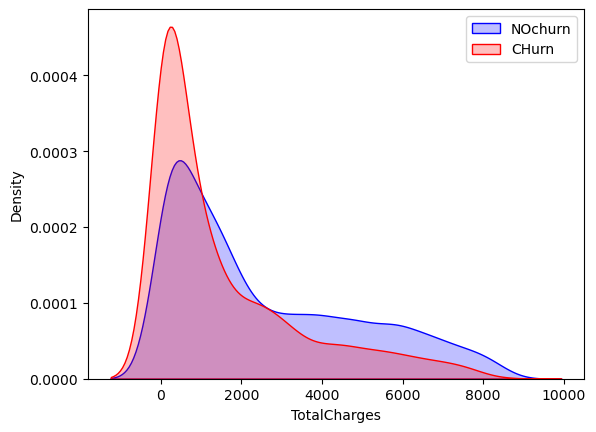

In [17]:
total=sns.kdeplot(telecom_data_dummies.TotalCharges[telecom_data_dummies['Churn']==0],color='blue',shade=True)
total=sns.kdeplot(telecom_data_dummies.TotalCharges[telecom_data_dummies['Churn']==1],color='red',shade=True)
total.legend(['NOchurn','CHurn'],loc='upper right')

**insight:** Churn Rate is high at lower TotalCharges and reduces
eventually

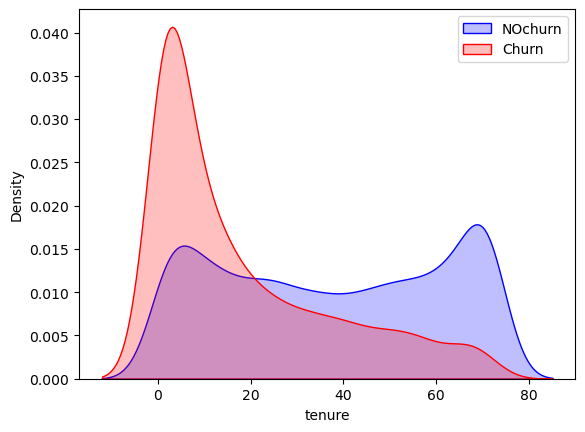

In [18]:
telecom_data_dummies['tenure']=telecom_data_raw['tenure']
total=sns.kdeplot(telecom_data_dummies.tenure[telecom_data_dummies['Churn']==0],color='blue',shade=True)
total=sns.kdeplot(telecom_data_dummies.tenure[telecom_data_dummies['Churn']==1],color='red',shade=True)
total.legend(['NOchurn','Churn'],loc='upper right')

**Insights:** Churn Rate is Higher in New Customers


.Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

In [19]:
telecom_data_dummies=telecom_data_dummies.drop('tenure',axis=1)
telecom_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


<AxesSubplot:>

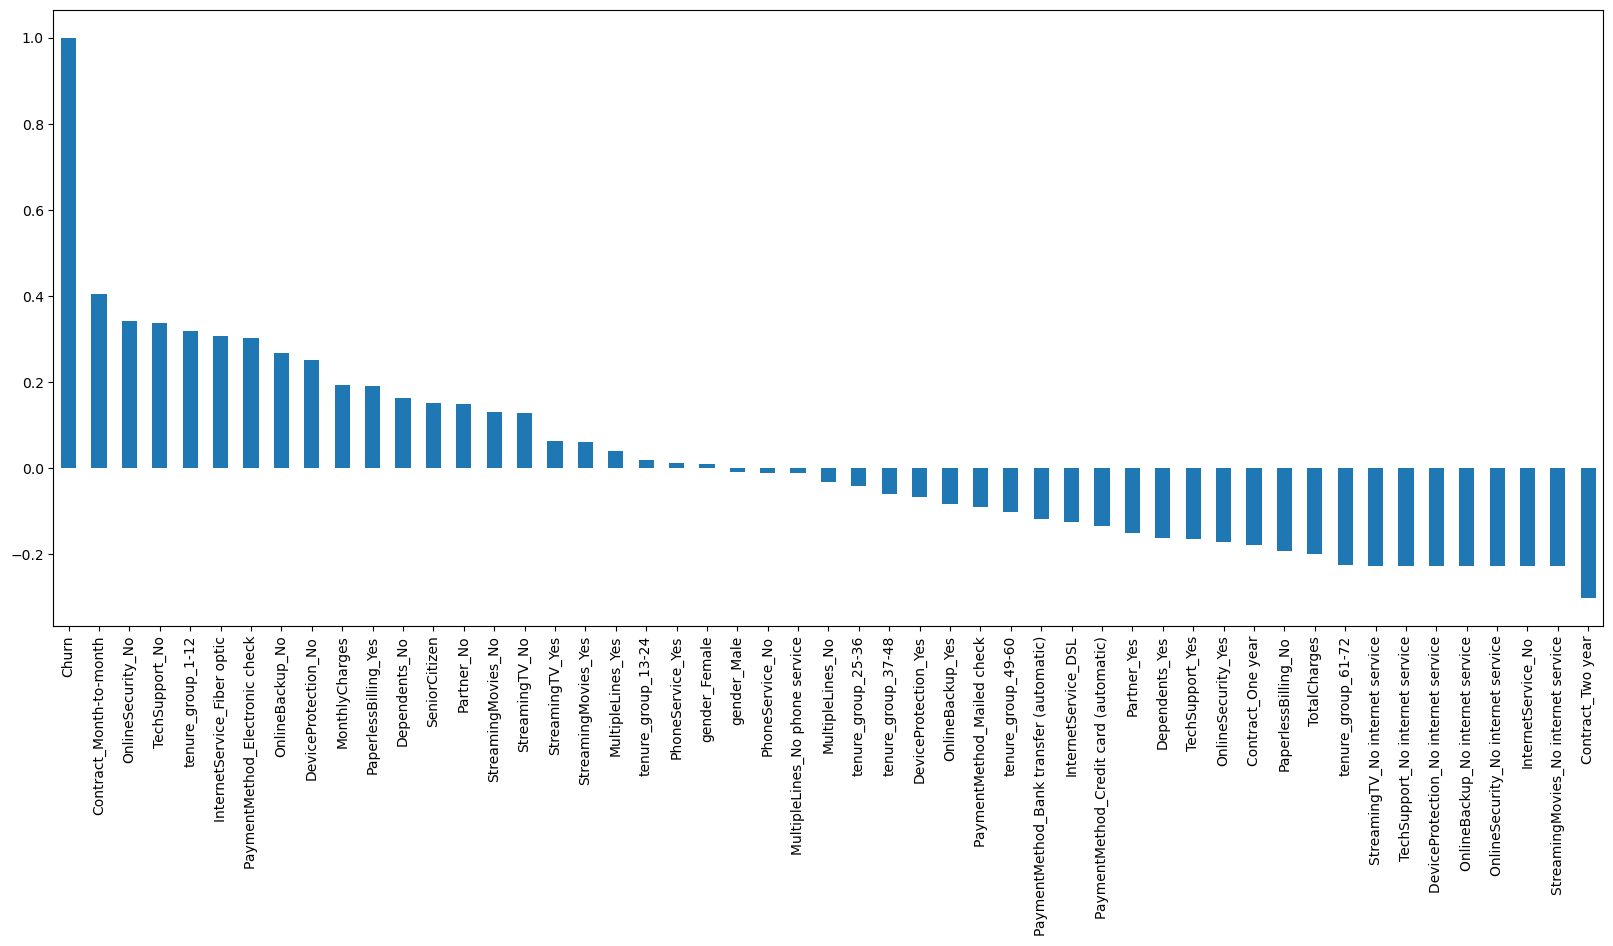

In [20]:
#checking correlations
plt.figure(figsize=(20,8))
telecom_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')


**Derived Insight:**

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

**BIVARIATE ANALYSIS**



In [21]:
new_df1_target0=telecom_data.loc[telecom_data['Churn']==0]
new_df1_target1=telecom_data.loc[telecom_data['Churn']==1]


In [22]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()
    
    

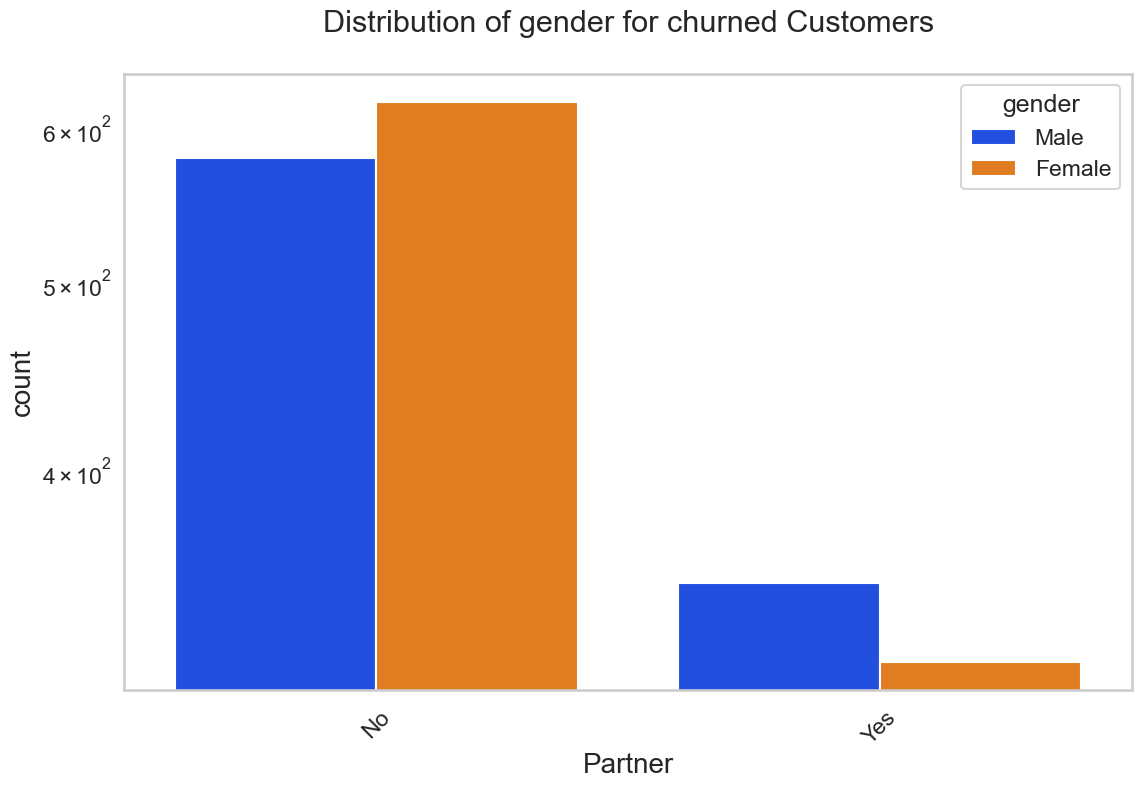

In [23]:
uniplot(new_df1_target1,col='Partner',title='Distribution of gender for churned Customers',hue='gender')

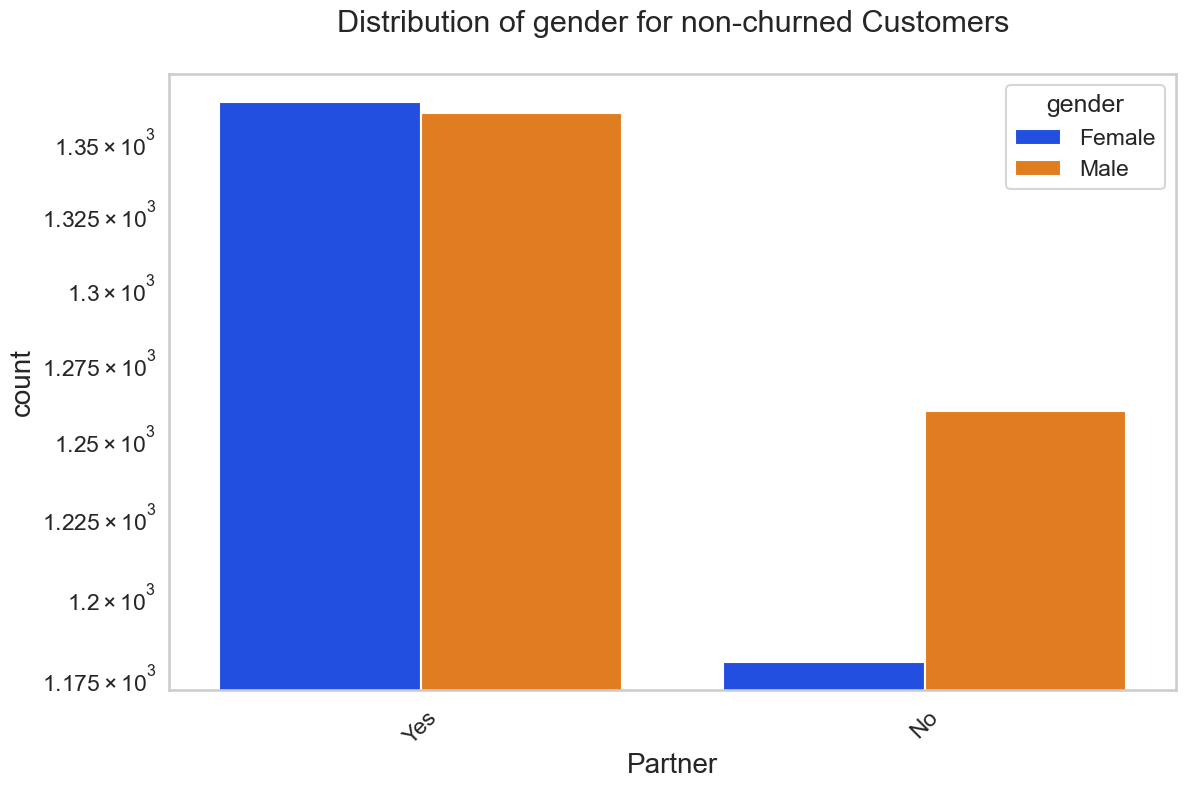

In [24]:
uniplot(new_df1_target0,col='Partner',title='Distribution of gender for non-churned Customers',hue='gender')

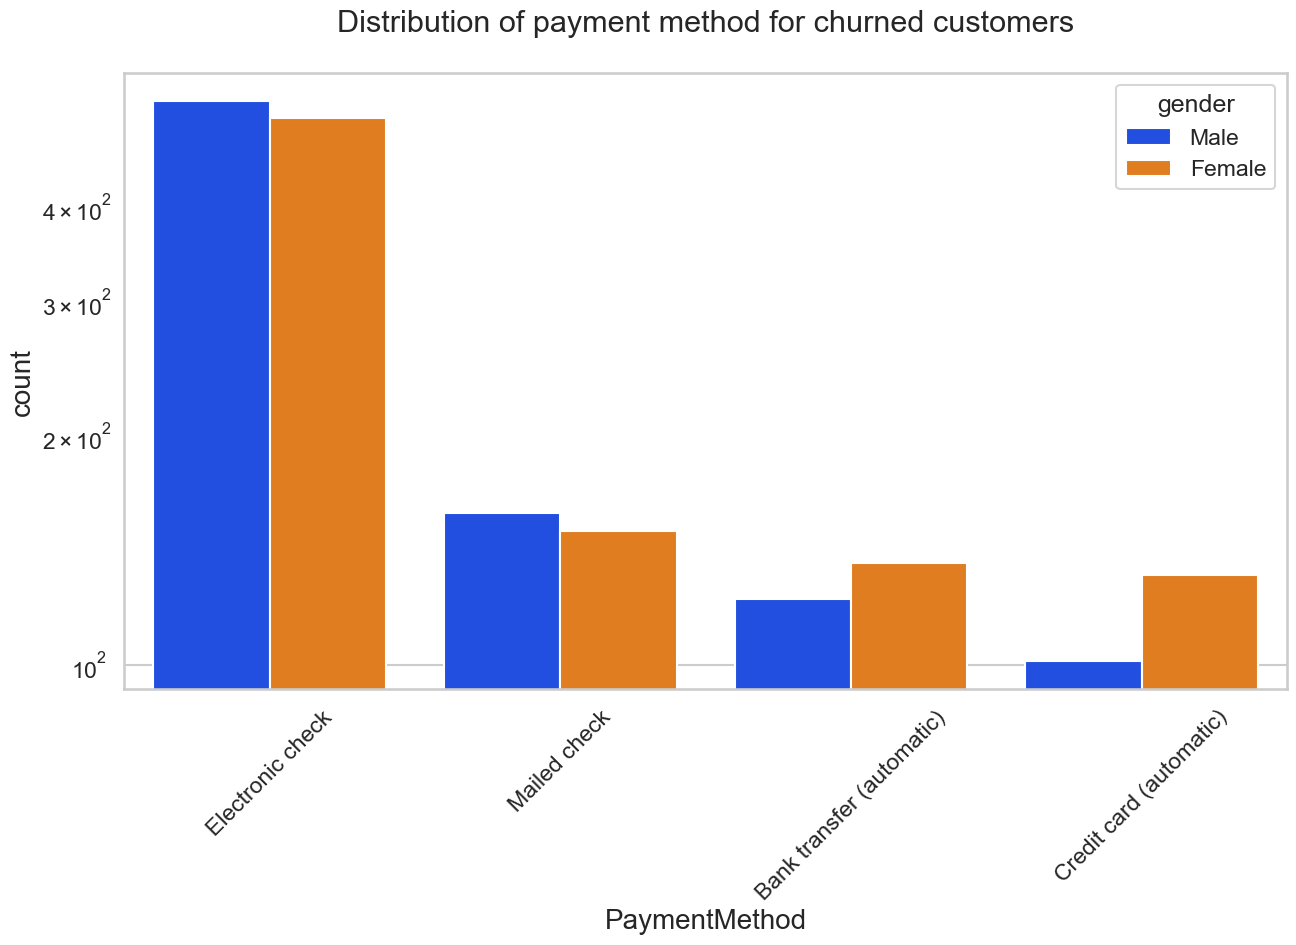

In [25]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of payment method for churned customers',hue='gender')

Out of churned people who uses creditcard for payment method females are more churners than men 

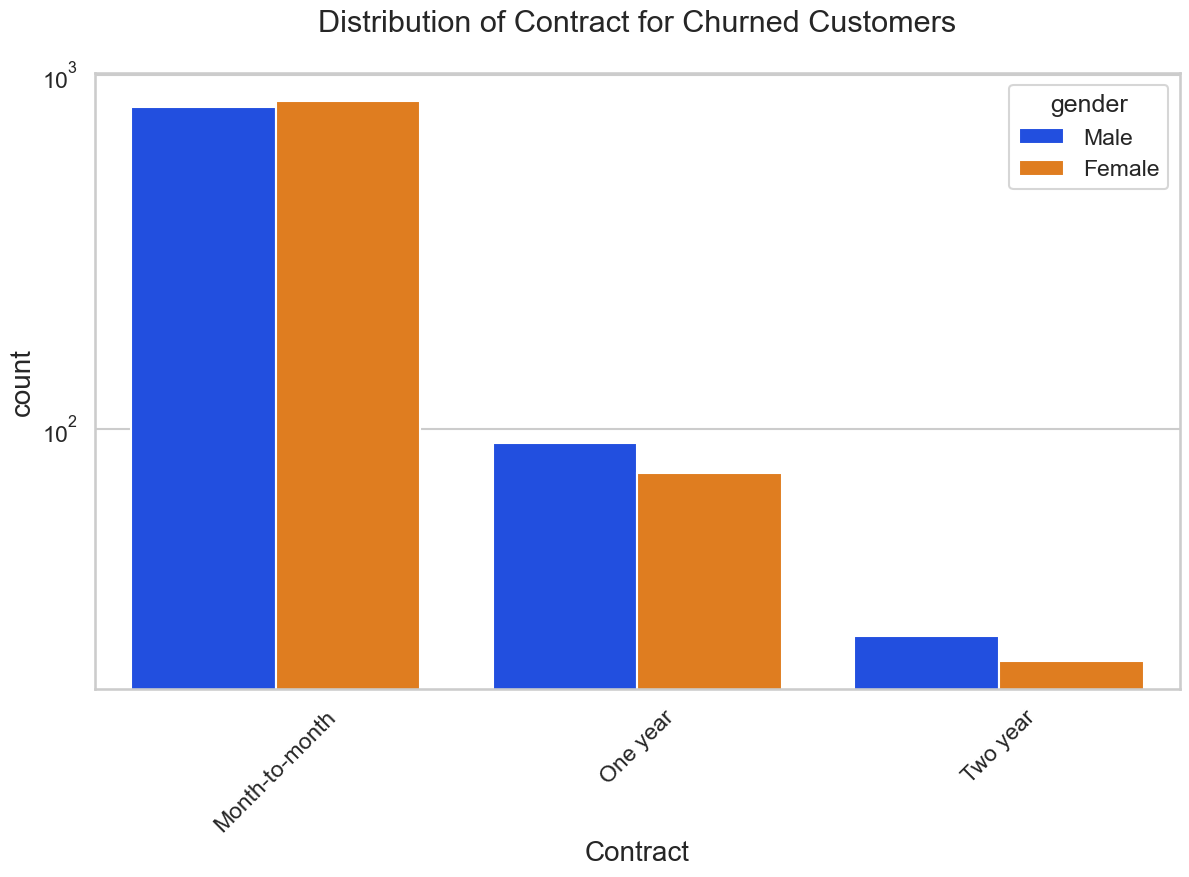

In [26]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')


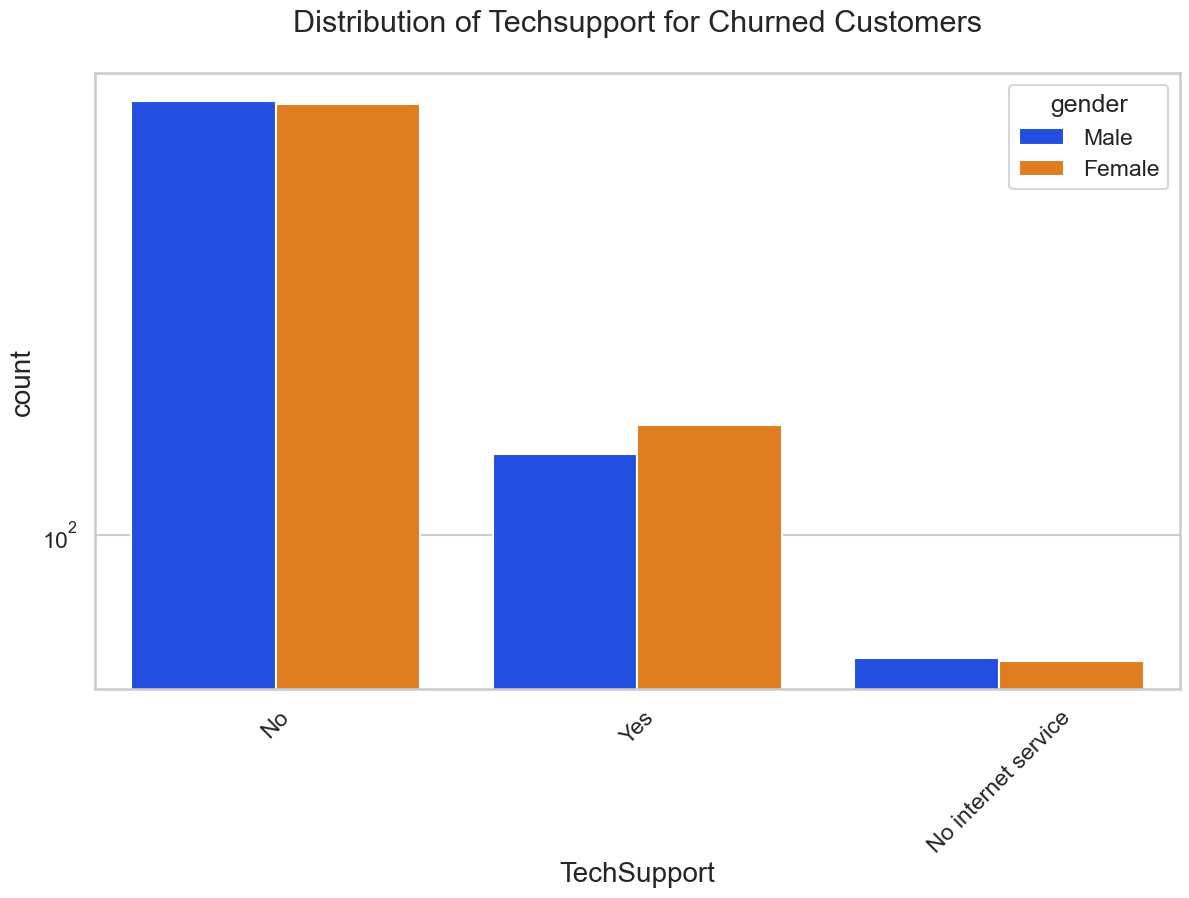

In [27]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of Techsupport for Churned Customers',hue='gender')

**INSIGHTS**

Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.

No Online security, No Tech Support category are high churners.


Non senior Citizens are high churners

Electronic check medium are the highest churners

# model building

In [28]:
#import required libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [29]:
telecom_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [30]:
data=telecom_data_dummies

In [31]:
#creating x and y variables
x=data.drop('Churn',axis=1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,1,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [32]:
y=data['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Decision tree classifier

In [34]:
model_dt=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [35]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [36]:
y_pred=model_dt.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1056
           1       0.63      0.55      0.59       351

    accuracy                           0.81      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [38]:
print(confusion_matrix(y_test,y_pred))

[[942 114]
 [158 193]]


In [39]:
#resample the datasets
sm=SMOTEENN()
X_resampled,y_resampled=sm.fit_resample(x,y)


In [40]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled,y_resampled,test_size=0.2)

In [41]:
model_dt_smote=DecisionTreeClassifier(criterion='gini',random_state=200,max_depth=6,min_samples_leaf=8)

In [42]:
model_dt_smote.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=200)

In [43]:
yr_pred=model_dt_smote.predict(xr_test)

In [44]:
print(classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       497
           1       0.95      0.96      0.96       666

    accuracy                           0.95      1163
   macro avg       0.95      0.95      0.95      1163
weighted avg       0.95      0.95      0.95      1163



In [45]:
print(confusion_matrix(yr_test,yr_pred))

[[465  32]
 [ 28 638]]


In [46]:
accuracy=(495+607)/(495+607+24+39)
accuracy

0.9459227467811159

### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model_rf=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=200,max_depth=6,min_samples_leaf=8)

In [49]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=200)

In [50]:
y_pred_rf=model_rf.predict(x_test)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1056
           1       0.63      0.55      0.59       351

    accuracy                           0.81      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [52]:
model_smote_rf=RandomForestClassifier(n_estimators=200,criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [53]:
model_smote_rf.fit(xr_train,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, n_estimators=200,
                       random_state=100)

In [54]:
y_pred_smote_rf=model_smote_rf.predict(xr_test)

In [55]:
print(classification_report(y_pred_smote_rf,yr_test))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       474
           1       0.97      0.94      0.95       689

    accuracy                           0.94      1163
   macro avg       0.94      0.95      0.94      1163
weighted avg       0.95      0.94      0.94      1163



In [56]:
print(confusion_matrix(y_pred_smote_rf,yr_test))

[[453  21]
 [ 44 645]]


In [57]:
accuracy_rf=(499+592)/(499+592+26+48)
accuracy_rf

0.936480686695279

### KNN Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn=KNeighborsClassifier()

In [72]:
knn.fit(xr_train,yr_train)

KNeighborsClassifier()

In [76]:
y_predknn=knn.predict(xr_test)
print(classification_report(pr,yr_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       481
           1       0.98      0.96      0.97       682

    accuracy                           0.97      1163
   macro avg       0.96      0.97      0.96      1163
weighted avg       0.97      0.97      0.97      1163



In [80]:
print(confusion_matrix(y_predknn,yr_test))

[[469  12]
 [ 28 654]]


In [82]:
knn_accuracy=(469+654)/(469+654+12+28)
knn_accuracy

0.9656061908856406

### SVM Classifier

In [85]:
from sklearn.svm import SVC

In [87]:
model_svm=SVC(kernel='linear')

In [89]:
model_svm.fit(xr_train,yr_train)

SVC(kernel='linear')

In [90]:
y_pred_svm=model_svm.predict(xr_test)

In [92]:
print(classification_report(y_pred_svm,yr_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       517
           1       0.93      0.96      0.94       646

    accuracy                           0.94      1163
   macro avg       0.94      0.93      0.94      1163
weighted avg       0.94      0.94      0.94      1163



In [93]:
print(confusion_matrix(y_pred_svm,yr_test))

[[470  47]
 [ 27 619]]


In [94]:
accuracy_svm=(470+619)/(470+619+47+27)
accuracy_svm

0.9363714531384351

### Hyperparameter tuning

In [129]:
from sklearn.model_selection import GridSearchCV

In [77]:
parameters={"n_neighbors":np.arange(1,100)}

In [95]:
#knn
Gridknnclassifier=GridSearchCV(knn,parameters,cv=10)

In [96]:
Gridknnclassifier.fit(xr_train,yr_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [131]:
Gridknnclassifier.best_params_

{'n_neighbors': 1}

In [132]:
Gridknnclassifier.best_score_

0.9849462365591399

In [97]:
y_pred_gridknn=Gridknnclassifier.predict(xr_test)


In [98]:
print(classification_report(y_pred_gridknn,yr_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       492
           1       1.00      0.99      0.99       671

    accuracy                           0.99      1163
   macro avg       0.99      0.99      0.99      1163
weighted avg       0.99      0.99      0.99      1163



In [100]:
print(confusion_matrix(y_pred_gridknn,yr_test))

[[489   3]
 [  8 663]]


In [103]:
knn_accuracy=(489+663)/(489+663+3+8)
knn_accuracy

0.9905417024935511